In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot

In [21]:
X = torch.tensor([[0.0], [1.0]])    # Input (lightness)
y = torch.tensor([[0.0], [1.0]])    # Output (dark/light)

In [22]:
class SimpleNeuron(nn.Module):
    def __init__(self):
        super(SimpleNeuron, self).__init__()
        self.weight = nn.Parameter(torch.randn(1, 1))  # Single weight
        self.bias = nn.Parameter(torch.randn(1))  # Single bias

    def forward(self, x):
        return torch.sigmoid(torch.matmul(x, self.weight) + self.bias)

In [23]:
model = SimpleNeuron()
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [24]:
for epoch in range(1000):
    # Forward pass
    outputs = model(X)
    loss = loss_fn(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss = {loss.item()}')

Epoch 0: Loss = 0.8957684636116028
Epoch 100: Loss = 0.37490737438201904
Epoch 200: Loss = 0.24073466658592224
Epoch 300: Loss = 0.17303401231765747
Epoch 400: Loss = 0.1334797441959381
Epoch 500: Loss = 0.10798446834087372
Epoch 600: Loss = 0.09034977853298187
Epoch 700: Loss = 0.07749756425619125
Epoch 800: Loss = 0.06774924695491791
Epoch 900: Loss = 0.060119807720184326


In [25]:
test_input = torch.tensor([[0.5]])
print(f'Test output (lightness 0.5): {model(test_input).item()}')

Test output (lightness 0.5): 0.5538426041603088


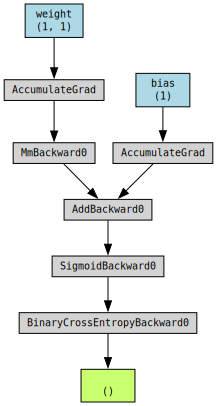

In [30]:
make_dot(loss, params=dict(model.named_parameters()))